In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

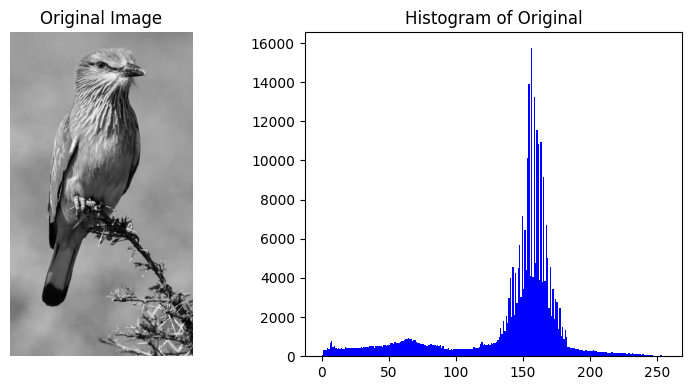

In [15]:
url = "https://static.toiimg.com/thumb/111777640/111777640.jpg?height=746&width=420&resizemode=76&imgsize=63108"

req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
resp = urllib.request.urlopen(req)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)

img_color = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='blue')
plt.title("Histogram of Original")
plt.tight_layout()
plt.show()

In [16]:
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

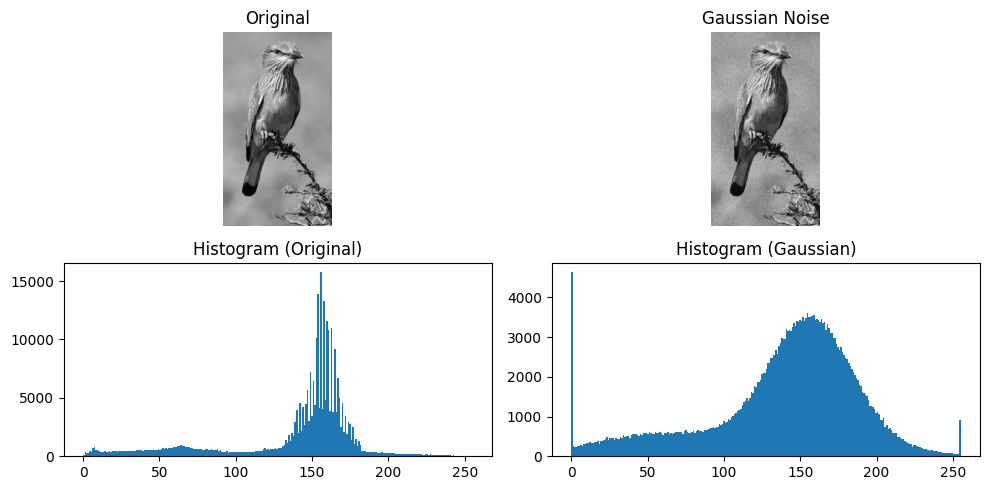

In [17]:
gauss_img = add_gaussian_noise(img)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(gauss_img, cmap='gray'); plt.title("Gaussian Noise"); plt.axis("off")
plt.subplot(2,2,3)
plt.hist(img.ravel(), bins=256); plt.title("Histogram (Original)")
plt.subplot(2,2,4)
plt.hist(gauss_img.ravel(), bins=256); plt.title("Histogram (Gaussian)")
plt.tight_layout(); plt.show()

In [9]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total = image.size
    # Salt
    num_salt = int(total * salt_prob)
    coords = (np.random.randint(0, image.shape[0], num_salt),
              np.random.randint(0, image.shape[1], num_salt))
    noisy[coords] = 255
    # Pepper
    num_pepper = int(total * pepper_prob)
    coords = (np.random.randint(0, image.shape[0], num_pepper),
              np.random.randint(0, image.shape[1], num_pepper))
    noisy[coords] = 0
    return noisy

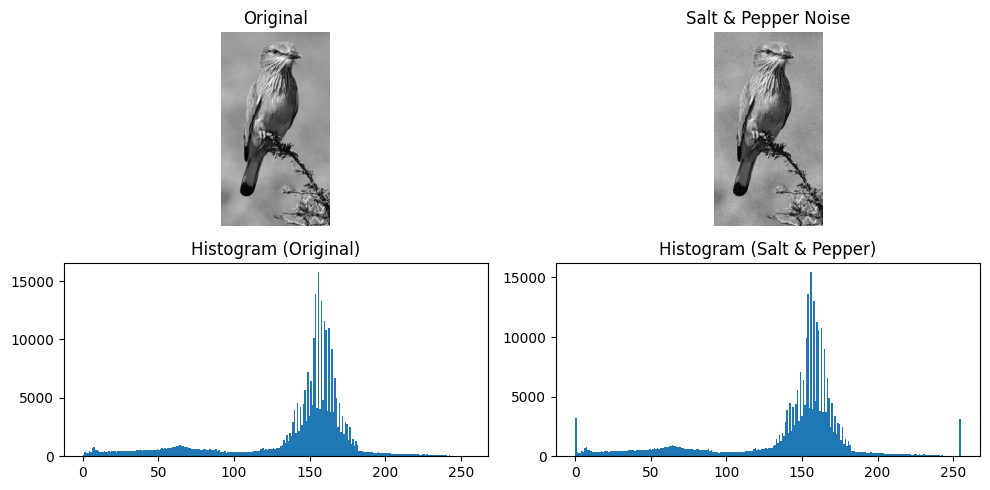

In [18]:
sp_img = add_salt_pepper_noise(img)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(sp_img, cmap='gray'); plt.title("Salt & Pepper Noise"); plt.axis("off")
plt.subplot(2,2,3)
plt.hist(img.ravel(), bins=256); plt.title("Histogram (Original)")
plt.subplot(2,2,4)
plt.hist(sp_img.ravel(), bins=256); plt.title("Histogram (Salt & Pepper)")
plt.tight_layout(); plt.show()

In [11]:
def add_speckle_noise(image):
    gauss = np.random.randn(*image.shape)
    noisy = image + image * gauss * 0.2
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

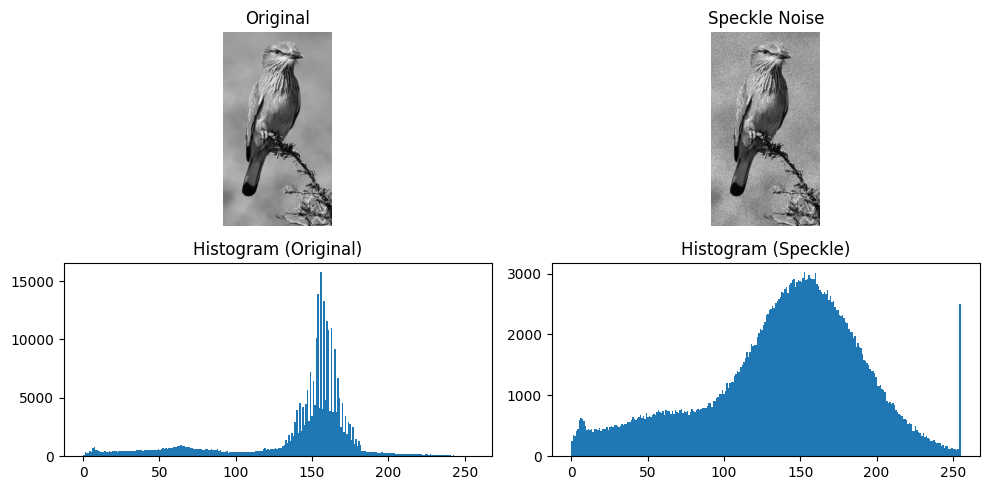

In [19]:
speckle_img = add_speckle_noise(img)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(speckle_img, cmap='gray'); plt.title("Speckle Noise"); plt.axis("off")
plt.subplot(2,2,3)
plt.hist(img.ravel(), bins=256); plt.title("Histogram (Original)")
plt.subplot(2,2,4)
plt.hist(speckle_img.ravel(), bins=256); plt.title("Histogram (Speckle)")
plt.tight_layout(); plt.show()

In [13]:
def add_impulse_noise(image, prob=0.02):
    noisy = image.copy()
    mask = np.random.rand(*image.shape) < prob
    noisy[mask] = np.random.randint(0, 256, np.count_nonzero(mask))
    return noisy

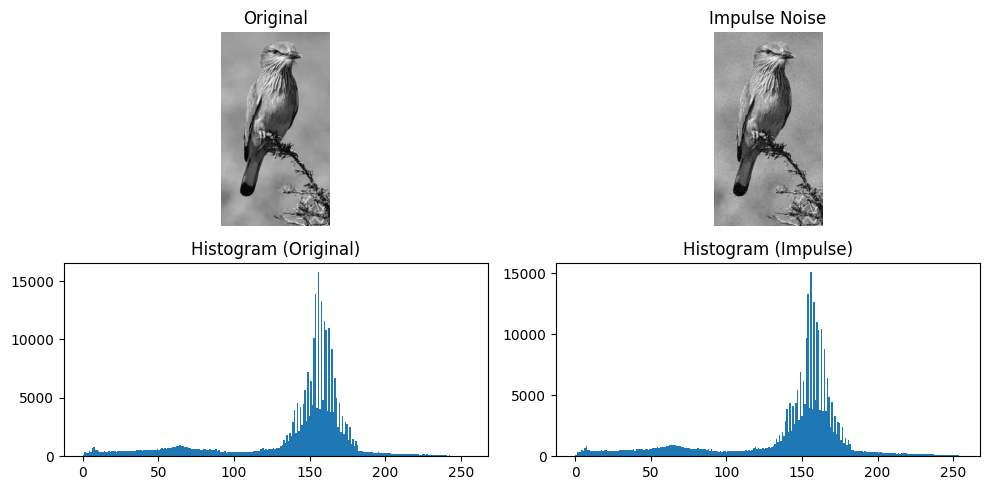

In [20]:
impulse_img = add_impulse_noise(img, prob=0.05)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(impulse_img, cmap='gray'); plt.title("Impulse Noise"); plt.axis("off")
plt.subplot(2,2,3)
plt.hist(img.ravel(), bins=256); plt.title("Histogram (Original)")
plt.subplot(2,2,4)
plt.hist(impulse_img.ravel(), bins=256); plt.title("Histogram (Impulse)")
plt.tight_layout(); plt.show()